In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import time 

In [2]:
data = pd.read_csv('EX_DATA.csv')

In [3]:
data.head(10)

,BUSINESS_ID,BAS_YM,TRN,DEFAULT,KCS01001,KCS01002,KCS01003,KCS01004,KCS01005,KCS01006,...,KCS05006,KCS05007,KCS05008,KCS05009,KCS05010,KCS06002,KCS06003,KCS06004,KCS06006,KCS07001
0,10000,201903,1,0,5111000,5090000,5892500,5913251,162,158,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
1,10000,201906,1,0,4995000,5075500,5082750,5636416,141,154,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
2,10000,201909,1,0,5669000,5359333,5217416,5554958,171,159,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
3,10000,201912,1,0,5155000,5611833,5485583,5284166,156,173,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
4,10000,202003,0,0,5219000,5232333,5422083,5319750,155,159,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
5,10000,202006,0,0,4893000,4867846,5050090,5267836,171,160,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
6,100010,201906,1,0,6196600,3228200,3228200,3228200,309,158,...,322,322,322,51,26,1000000,12000000,8,38986354,-999
7,100010,201909,1,0,4125900,5148621,4380452,4380452,196,237,...,514,438,438,34,42,1000000,12000000,8,38986354,-999
8,100010,201912,1,0,5021800,4335933,4742277,4363758,242,209,...,433,474,436,41,36,1000000,12000000,8,38986354,-999
9,100010,202003,0,0,2572800,3233333,3784633,4055460,116,157,...,323,378,405,21,26,1000000,12000000,8,38986354,-999


In [4]:
# 2019년 데이터만 추출하여 분석, BAS_YM 및 BUSINESS_ID는 영향없는 변수로 제거
data = data[data['TRN'] == 1]
X_data = data.drop(['BAS_YM', 'BUSINESS_ID', 'TRN', 'DEFAULT'], axis=1)
X_data

,KCS01001,KCS01002,KCS01003,KCS01004,KCS01005,KCS01006,KCS01007,KCS01008,KCS01009,KCS01010,...,KCS05006,KCS05007,KCS05008,KCS05009,KCS05010,KCS06002,KCS06003,KCS06004,KCS06006,KCS07001
0,5111000,5090000,5892500,5913251,162,158,170,176,3237500,3019166,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
1,4995000,5075500,5082750,5636416,141,154,156,167,2404000,2753833,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
2,5669000,5359333,5217416,5554958,171,159,156,163,3247000,2866666,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
3,5155000,5611833,5485583,5284166,156,173,166,161,3546000,3273166,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
6,6196600,3228200,3228200,3228200,309,158,158,158,195400,195400,...,322,322,322,51,26,1000000,12000000,8,38986354,-999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
363946,7326900,8587266,8647933,8485866,178,207,213,218,0,0,...,858,864,848,36,42,1000000,20000000,5,27716186,-999
363947,7992500,7836766,8212016,8409683,196,190,198,211,0,0,...,783,821,840,39,39,1000000,20000000,5,27716186,-999
363950,4220000,1631933,3110550,4461000,525,196,391,559,281500,107266,...,2363,4505,6461,4220000,1631933,69044,0,69044,0,-999
363951,3363700,4571766,3101850,4494230,384,552,374,557,198200,332200,...,6621,4492,6509,3363700,4571766,69044,0,69044,0,-999


In [5]:
# 2019년 DEFAULT 결과변수 추출
Y_data = data['DEFAULT']
Y_data

0         0
1         0
2         0
3         0
6         0
         ..
363946    0
363947    0
363950    0
363951    0
363952    0
Name: DEFAULT, Length: 219554, dtype: int64

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X_data, Y_data, test_size=0.2, random_state=11)

In [7]:
# 평가 함수
def get_clf_eval(y_test, pred=None, pred_proba=None):
    confusion = confusion_matrix(y_test,pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    # F1 Score 추가
    f1 = f1_score(y_test, pred)
    # ROC-AUC 추가
    roc_auc = roc_auc_score(y_test, pred_proba)
    print('오차 행렬')
    print(confusion)
    # ROC-AUC print 추가
    print('정확도: {0:.4f}, 정밀도:{1:.4f}, 재현율:{2:.4f},\ F1:{3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))

In [8]:
print('학습 데이터 레이블 값 비율')
print(y_train.value_counts()/y_train.shape[0] *100)
print('테스트 데이터 레이블 값 비율')
print(y_test.value_counts()/y_test.shape[0]*100)

학습 데이터 레이블 값 비율
0    99.298008
1     0.701992
Name: DEFAULT, dtype: float64
테스트 데이터 레이블 값 비율
0    99.234816
1     0.765184
Name: DEFAULT, dtype: float64


In [10]:
def get_model_train_eval(model, ftr_train=None, ftr_test=None, tgt_train=None, tgt_test=None):
    model.fit(ftr_train, tgt_train)
    pred = model.predict(ftr_test)
    pred_proba = model.predict_proba(ftr_test)[:, 1]
    get_clf_eval(tgt_test, pred, pred_proba)

In [11]:
# lightbgm fitting
from lightgbm import LGBMClassifier
lgbm_clf = LGBMClassifier(n_estimators=1000, num_leaves=64, n_jobs=-1, boost_from_average=False)
get_model_train_eval(lgbm_clf, ftr_train=X_train, ftr_test=X_test, tgt_train=y_train, tgt_test=y_test)

오차 행렬
[[43573     2]
 [  333     3]]
정확도: 0.9924, 정밀도:0.6000, 재현율:0.0089,\ F1:0.0176, AUC:0.8383


In [12]:
# RandomForestClassifier 학습/예측/평가
from sklearn.model_selection import GridSearchCV

rf_clf = RandomForestClassifier(random_state=0)
rf_clf.fit(X_train, y_train)
rf_pred = rf_clf.predict(X_test)
rf_pred_proba = rf_clf.predict_proba(X_test)[:, 1]

# 평가 함수 사용
get_clf_eval(y_test, rf_pred, lr_pred_proba)

오차 행렬
[[43575     0]
 [  335     1]]
정확도: 0.9924, 정밀도:1.0000, 재현율:0.0030,\ F1:0.0059, AUC:0.6548


In [13]:
# Decision tree 학습/예측/평가
dt_clf = DecisionTreeClassifier(random_state=156)
dt_clf.fit(X_train, y_train)
dt_pred = dt_clf.predict(X_test)
dt_pred_proba = dt_clf.predict_proba(X_test)[:, 1]

# 평가 함수 사용
get_clf_eval(y_test, dt_pred, dt_pred_proba)

오차 행렬
[[43222   353]
 [  316    20]]
정확도: 0.9848, 정밀도:0.0536, 재현율:0.0595,\ F1:0.0564, AUC:0.5257


Feature: 0, Score: 0.0188
Feature: 1, Score: 0.0193
Feature: 2, Score: 0.0184
Feature: 3, Score: 0.0201
Feature: 4, Score: 0.0165
Feature: 5, Score: 0.0167
Feature: 6, Score: 0.0173
Feature: 7, Score: 0.0180
Feature: 8, Score: 0.0116
Feature: 9, Score: 0.0121
Feature: 10, Score: 0.0134
Feature: 11, Score: 0.0142
Feature: 12, Score: 0.0102
Feature: 13, Score: 0.0102
Feature: 14, Score: 0.0105
Feature: 15, Score: 0.0118
Feature: 16, Score: 0.0170
Feature: 17, Score: 0.0175
Feature: 18, Score: 0.0188
Feature: 19, Score: 0.0145
Feature: 20, Score: 0.0139
Feature: 21, Score: 0.0149
Feature: 22, Score: 0.0141
Feature: 23, Score: 0.0149
Feature: 24, Score: 0.0170
Feature: 25, Score: 0.0171
Feature: 26, Score: 0.0120
Feature: 27, Score: 0.0118
Feature: 28, Score: 0.0124
Feature: 29, Score: 0.0123
Feature: 30, Score: 0.0172
Feature: 31, Score: 0.0183
Feature: 32, Score: 0.0150
Feature: 33, Score: 0.0142
Feature: 34, Score: 0.0143
Feature: 35, Score: 0.0192
Feature: 36, Score: 0.0071
Feature: 37

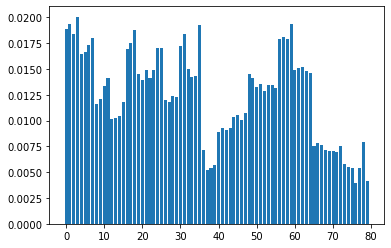

In [31]:
# RandomForestClassifier 변수 중요도 평가
from matplotlib import pyplot
# get importance
importance = rf_clf.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.4f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

Feature: 0, Score: 0.0246
Feature: 1, Score: 0.0236
Feature: 2, Score: 0.0166
Feature: 3, Score: 0.0150
Feature: 4, Score: 0.0134
Feature: 5, Score: 0.0151
Feature: 6, Score: 0.0148
Feature: 7, Score: 0.0208
Feature: 8, Score: 0.0093
Feature: 9, Score: 0.0145
Feature: 10, Score: 0.0145
Feature: 11, Score: 0.0219
Feature: 12, Score: 0.0058
Feature: 13, Score: 0.0071
Feature: 14, Score: 0.0052
Feature: 15, Score: 0.0100
Feature: 16, Score: 0.0194
Feature: 17, Score: 0.0268
Feature: 18, Score: 0.0212
Feature: 19, Score: 0.0134
Feature: 20, Score: 0.0129
Feature: 21, Score: 0.0058
Feature: 22, Score: 0.0127
Feature: 23, Score: 0.0117
Feature: 24, Score: 0.0216
Feature: 25, Score: 0.0240
Feature: 26, Score: 0.0102
Feature: 27, Score: 0.0107
Feature: 28, Score: 0.0100
Feature: 29, Score: 0.0077
Feature: 30, Score: 0.0153
Feature: 31, Score: 0.0173
Feature: 32, Score: 0.0112
Feature: 33, Score: 0.0125
Feature: 34, Score: 0.0081
Feature: 35, Score: 0.0378
Feature: 36, Score: 0.0070
Feature: 37

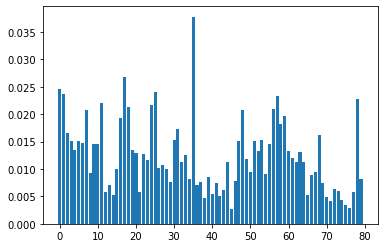

In [32]:
# Decision Tree 변수 중요도 평가
# get importance
importance = dt_clf.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.4f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

Feature: 0, Score: 1134.0000
Feature: 1, Score: 901.0000
Feature: 2, Score: 804.0000
Feature: 3, Score: 1138.0000
Feature: 4, Score: 1141.0000
Feature: 5, Score: 831.0000
Feature: 6, Score: 776.0000
Feature: 7, Score: 1254.0000
Feature: 8, Score: 572.0000
Feature: 9, Score: 483.0000
Feature: 10, Score: 500.0000
Feature: 11, Score: 990.0000
Feature: 12, Score: 456.0000
Feature: 13, Score: 316.0000
Feature: 14, Score: 410.0000
Feature: 15, Score: 564.0000
Feature: 16, Score: 1261.0000
Feature: 17, Score: 1061.0000
Feature: 18, Score: 1349.0000
Feature: 19, Score: 1107.0000
Feature: 20, Score: 846.0000
Feature: 21, Score: 1023.0000
Feature: 22, Score: 867.0000
Feature: 23, Score: 764.0000
Feature: 24, Score: 788.0000
Feature: 25, Score: 1147.0000
Feature: 26, Score: 657.0000
Feature: 27, Score: 509.0000
Feature: 28, Score: 472.0000
Feature: 29, Score: 771.0000
Feature: 30, Score: 1008.0000
Feature: 31, Score: 1010.0000
Feature: 32, Score: 976.0000
Feature: 33, Score: 821.0000
Feature: 34,

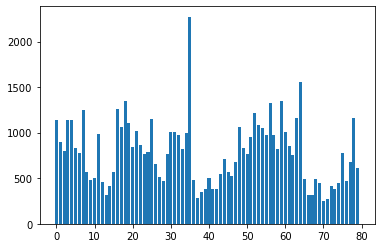

In [33]:
# LightGBM 변수 중요도 평가
# get importance
importance = lgbm_clf.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.4f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [35]:
# from xgboost import plot_importance, XGBClassifier
xgb_clf = XGBClassifier(n_estimators=500, random_state=156)
xgb_clf.fit(X_train, y_train, early_stopping_rounds=100, eval_metric="auc", eval_set=[(X_train, y_train),(X_test, y_test)])
xgb_roc_score = roc_auc_score(y_test, xgb_clf.predict_proba(X_test)[:,1], average='macro')
print('ROC AUC: {0:.4f}'.format(xgb_roc_score))

/Applications/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.64227	validation_1-auc:0.67337
[1]	validation_0-auc:0.68957	validation_1-auc:0.70576
[2]	validation_0-auc:0.69497	validation_1-auc:0.70943
[3]	validation_0-auc:0.71804	validation_1-auc:0.73264
[4]	validation_0-auc:0.72449	validation_1-auc:0.73540
[5]	validation_0-auc:0.73015	validation_1-auc:0.73416
[6]	validation_0-auc:0.73516	validation_1-auc:0.73815
[7]	validation_0-auc:0.75374	validation_1-auc:0.74446
[8]	validation_0-auc:0.76042	validation_1-auc:0.74420
[9]	validation_0-auc:0.77269	validation_1-auc:0.74442
[10]	validation_0-auc:0.78857	validation_1-auc:0.74960
[11]	validation_0-auc:0.79935	validation_1-auc:0.74979
[12]	validation_0-auc:0.81320	validation_1-auc:0.74855
[13]	validation_0-auc:0.83144	validation_1-auc:0.75442
[14]	validation_0-auc:0.84291	validation_1-auc:0.75675
[15]	validation_0-auc:0.85221	validation_1-auc:0.75778
[16]	validation_0-auc:0.86447	validation_1-auc:0.76566
[17]	validation_0-auc:0.87509	validation_1-auc:0.77155
[18]	validation_0-au

[149]	validation_0-auc:0.99889	validation_1-auc:0.81892
[150]	validation_0-auc:0.99889	validation_1-auc:0.81922
[151]	validation_0-auc:0.99892	validation_1-auc:0.82045
[152]	validation_0-auc:0.99893	validation_1-auc:0.82117
[153]	validation_0-auc:0.99895	validation_1-auc:0.82089
[154]	validation_0-auc:0.99896	validation_1-auc:0.82097
[155]	validation_0-auc:0.99897	validation_1-auc:0.82051
[156]	validation_0-auc:0.99898	validation_1-auc:0.82009
[157]	validation_0-auc:0.99903	validation_1-auc:0.82023
[158]	validation_0-auc:0.99904	validation_1-auc:0.82014
[159]	validation_0-auc:0.99907	validation_1-auc:0.81997
[160]	validation_0-auc:0.99908	validation_1-auc:0.82000
[161]	validation_0-auc:0.99909	validation_1-auc:0.81990
[162]	validation_0-auc:0.99910	validation_1-auc:0.81924
[163]	validation_0-auc:0.99910	validation_1-auc:0.81928
[164]	validation_0-auc:0.99911	validation_1-auc:0.81860
[165]	validation_0-auc:0.99912	validation_1-auc:0.81898
[166]	validation_0-auc:0.99912	validation_1-auc:

/Applications/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

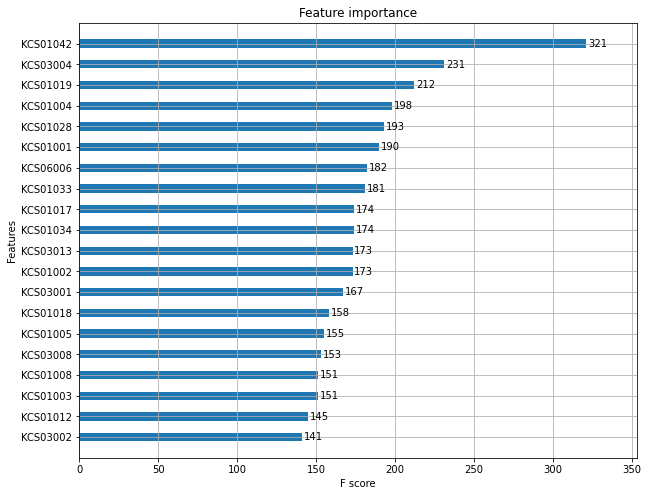

In [36]:
fig, ax = plt.subplots(1, 1, figsize=(10, 8))
plot_importance(xgb_clf, ax=ax, max_num_features=20, height=0.4)

# XGboost


| **Importance** 	| **변수** 	|                       **변수설명**                      	| **ROC AUC** 	|
|:--------------:	|:--------:	|:-------------------------------------------------------:	|:-----------:	|
|        1       	| KCS01042 	|       최근 03개월 평균 시간별 최소 카드 매출 금액       	|    0.8212   	|
|        2       	| KCS03004 	|          최근 12개월 평균 재방문 카드 매출 금액         	|             	|
|        3       	| KCS01019 	| 최근 06개월 평균 저녁시간(18:00 ~ 20:00) 카드 매출 금액 	|             	|
|        4       	| KCS01004 	|             최근 12개월 평균 카드 매출 금액             	|             	|
|        5       	| KCS01028 	| 최근 12개월 평균 중간시간(14:00 ~ 18:00) 카드 매출 금액 	|             	|
|        6       	| KCS01001 	|             최근 01개월 평균 카드 매출 금액             	|             	|
|        7       	| KCS06006 	|                   매장면적 대비 보증금                  	|             	|
|        8       	| KCS01033 	|       최근 01개월 평균 시간별 최대 카드 매출 금액       	|             	|
|        9       	| KCS01017 	| 최근 01개월 평균 저녁시간(18:00 ~ 20:00) 카드 매출 금액 	|             	|
|       10       	| KCS01034 	|       최근 03개월 평균 시간별 최대 카드 매출 금액       	|             	|



# Decision Tree 

| **Number** | **변수** | **Importance** |                                      **변수설명**                                      | **ROC AUC** |
|:----------:|:--------:|:--------------:|:--------------------------------------------------------------------------------------:|:-----------:|
|      1     | KCS01042 |      0.037     |       최근   03개월 평균 시간별 최소 카드 매출 금액(카드 매출 보유 개월 수 기준)       |    0.5257   |
|      2     | KCS01017 |     0.02676    | 최근 01개월 평균 저녁시간(18:00 ~   20:00) 카드 매출 금액(카드 매출 보유 개월 수 기준) |             |
|      3     | KCS01001 |     0.02461    |             최근 01개월 평균 카드 매출 금액(카드 매출   보유 개월 수 기준)             |             |
|      4     | KCS01028 |      0.024     | 최근 12개월 평균 중간시간(14:00 ~   18:00) 카드 매출 금액(카드 매출 보유 개월 수 기준) |             |
|      5     | KCS01002 |      0.236     |             최근 03개월 평균 카드 매출 금액(카드 매출   보유 개월 수 기준)             |             |
|      6     | KCS03002 |     0.02339    |          최근 03개월 평균 재방문 카드 매출 금액(카드   매출 보유 개월 수 기준)         |             |
|      7     | KCS06006 |     0.02276    |                                  매장면적 대비 보증금                                  |             |
|      8     | KCS01012 |     0.02195    | 최근 12개월 평균 점심시간(12:00 ~   14:00) 카드 매출 금액(카드 매출 보유 개월 수 기준) |             |
|      9     | KCS01027 |     0.02161    | 최근 06개월 평균 중간시간(14:00 ~   18:00) 카드 매출 금액(카드 매출 보유 개월 수 기준) |             |
|     10     | KCS01019 |     0.02123    | 최근 06개월 평균 저녁시간(18:00 ~   20:00) 카드 매출 금액(카드 매출 보유 개월 수 기준) |             |

# RandomForest

| **Number** | **변수** | **Importance** |                                      **변수설명**                                      | **ROC AUC** |
|:----------:|:--------:|:--------------:|:--------------------------------------------------------------------------------------:|:-----------:|
|      1     | KCS01004 |     0.0201     |             최근   12개월 평균 카드 매출 금액(카드 매출 보유 개월 수 기준)             |    0.6548   |
|      2     | KCS03004 |     0.0194     |          최근 12개월 평균 재방문 카드 매출   금액(카드 매출 보유 개월 수 기준)         |             |
|      3     | KCS01002 |     0.0193     |             최근 03개월 평균 카드 매출   금액(카드 매출 보유 개월 수 기준)             |             |
|      4     | KCS01042 |     0.0192     |       최근 03개월 평균 시간별 최소 카드   매출 금액(카드 매출 보유 개월 수 기준)       |             |
|      5     | KCS01001 |     0.0188     |             최근 01개월 평균 카드 매출   금액(카드 매출 보유 개월 수 기준)             |             |
|      6     | KCS01019 |     0.0188     | 최근 06개월 평균   저녁시간(18:00 ~ 20:00) 카드 매출 금액(카드 매출 보유 개월 수 기준) |             |
|      7     | KCS01003 |     0.0184     |             최근 06개월 평균 카드 매출   금액(카드 매출 보유 개월 수 기준)             |             |
|      8     | KCS01034 |     0.0183     |       최근 03개월 평균 시간별 최대 카드   매출 금액(카드 매출 보유 개월 수 기준)       |             |
|      9     | KCS03002 |      0.018     |          최근 03개월 평균 재방문 카드 매출   금액(카드 매출 보유 개월 수 기준)         |             |
|     10     | KCS01008 |      0.018     |             최근 12개월 평균 카드 매출   건수(카드 매출 보유 개월 수 기준)             |             |

# LightGBM

| **Number** | **변수** | **Score** |                                      **변수설명**                                      | **ROC AUC** |
|:----------:|:--------:|:---------:|:--------------------------------------------------------------------------------------:|:-----------:|
|      1     | KCS01042 |    2272   |       최근   03개월 평균 시간별 최소 카드 매출 금액(카드 매출 보유 개월 수 기준)       |    0.8383   |
|      2     | KCS03013 |    1553   |                   최근 01개월 전체 대비 재방문 카드   매출 건수 비중                   |             |
|      3     | KCS01019 |    1349   | 최근 06개월 평균   저녁시간(18:00 ~ 20:00) 카드 매출 금액(카드 매출 보유 개월 수 기준) |             |
|      4     | KCS03004 |    1343   |          최근 12개월 평균 재방문 카드 매출   금액(카드 매출 보유 개월 수 기준)         |             |
|      5     | KCS03001 |    1324   |          최근 01개월 평균 재방문 카드 매출   금액(카드 매출 보유 개월 수 기준)         |             |
|      6     | KCS01017 |    1261   | 최근 01개월 평균   저녁시간(18:00 ~ 20:00) 카드 매출 금액(카드 매출 보유 개월 수 기준) |             |
|      7     | KCS01008 |    1254   |             최근 12개월 평균 카드 매출   건수(카드 매출 보유 개월 수 기준)             |             |
|      8     | KCS02007 |    1216   |                 최근 06개월 대비 최근 01개월   합산 카드 매출 금액 비중                |             |
|      9     | KCS03008 |    1159   |          최근 12개월 평균 재방문 카드 매출   건수(카드 매출 보유 개월 수 기준)         |             |
|     10     | KCS06006 |    1157   |                                  매장면적 대비 보증금                                  |             |